In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# numpy pseudo-random number generation
np.random.seed(seed=1184445)

In [3]:
data = np.genfromtxt('dataset/sonar/sonar.csv', delimiter=',')
X = data[:,:-1] # delete the last column
label = np.genfromtxt('dataset/sonar/sonar.csv', dtype='S1', usecols=X.shape[1], delimiter=',')
y = (label == label[-1]).astype(int) # make labels either zeros or ones
tau = 1e-6

In [4]:
print("Dimension of X: {0}".format(X.shape))
print("Dimension of y: {0}".format(len(y)))

Dimension of X: (208, 60)
Dimension of y: 208


### Function

The expression of the regularized logistic regression function, for given $X = [\xi_1 , \dots, \xi_m]^T$ and $y = [y_1 , \dots, y_m]^T$, is

\begin{equation}
f(w) = \sum_{i=0}^{m-1} \log (1 + \exp(-y_i \xi_i^{T} w)) + \dfrac{\tau}{2} \| w \|^{2}
\end{equation}

which can be rewritten as

\begin{equation}
f(w) = e^{T} \log (I+ \exp(-\text{diag}(y) X w)) + \dfrac{\tau}{2} \| w \|^{2}
\end{equation}

In [5]:
# define function as Python function
def f_logreg(X,y,w,tau=tau):
    m = len(y)
    f = 0
    for i in range(m):
        z = -y[i]*np.dot(X[i], w) # z=-y_i*X_i^T*w
        f = f + np.log(1+np.exp(z)) # log(1+exp(-z))
    f = f + 0.5*tau*np.dot(w,w)
    return f

In [6]:
# define function as lambda function
Z = np.matmul(np.diag(y), X)
f = lambda w : np.sum(np.log(1+np.exp(-np.matmul(Z,w))))+0.5*tau*np.dot(w,w)

In [7]:
# compare the Python function with the lambda function

N = 1000 # number of iterations

W = 10*(np.random.random_sample((X.shape[1],N))-0.5)

V1 = []
T1 = []

# Measure time for Python function
start_time = time.time()
for i in range(N):
    w = W[:,i]
    V1.append(f_logreg(X,y,w))
    curr_time = time.time()
    T1.append(curr_time-start_time)
        
end_time = time.time()
print("Time elapsed with Python function: {0} seconds".format(end_time-start_time))

V2 = []
T2 = []

# Measure time for lambda function
start_time = time.time()
for i in range(N):
    w = W[:,i]
    V2.append(f(w))
    curr_time = time.time()
    T2.append(curr_time-start_time)
        
end_time = time.time()
print("Time elapsed with lambda function: {0} seconds".format(end_time-start_time))

# Verify that the two functions coincide
V = np.abs(np.array(V1) - np.array(V2))
print("Average difference between the two functions: {0}".format(np.sum(V)/N))

Time elapsed with Python function: 2.3603718280792236 seconds
Time elapsed with lambda function: 0.04014134407043457 seconds
Average difference between the two functions: 1.4378542800841388e-13


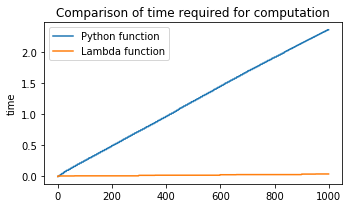

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(T1, label='Python function')
ax.plot(T2, label='Lambda function')
ax.set_title('Comparison of time required for computation')
ax.legend(loc='upper left')
ax.set_ylabel('number of computed samples')
ax.set_ylabel('time')
fig.tight_layout()

In [9]:
# define gradient as Python function
def grad_logreg(X,y,w,tau=tau):
    m = len(y)
    g = 0
    for i in range(m):
        z = -y[i]*np.dot(X[i], w) # z=-y_i*X_i^T*w
        h = 1/(1+np.exp(z))
        g = g - y[i]*X[i]*(1-h)
    g = g + tau*w
    return g

### Gradient

The expression of the gradient is given by

\begin{equation}
\nabla f (w) = -\sum_{i=0}^{m-1}  y_i \xi_i \left(1 - \dfrac{1}{1+\exp(-y_i \xi_i^T w)} \right) + \tau w
\end{equation}

which can be rewritten as

\begin{equation}
\nabla f (w) = -e^{T} \left( (I + A(w))^{-1}  A(w)) \right)
\end{equation}

where $A(w)=\text{diag}(\exp( - \text{diag} (y) Xw )$


In [10]:
# define gradient as lambda function

I = np.eye(len(y))
A = lambda w: np.diag(np.exp(-np.matmul(Z, w)))

grad_f = lambda w : -np.sum(np.matmul(np.linalg.inv(I + A(w)), np.matmul(A(w), Z)),0)+tau*w

In [11]:
# compare the Python gradient with the lambda gradient

N = 1000 # number of iterations

W = 10*(np.random.random_sample((X.shape[1],N))-0.5)

V1 = []
T1 = []

# Measure time for Python function
start_time = time.time()
for i in range(N):
    w = W[:,i]
    V1.append(grad_logreg(X,y,w))
    curr_time = time.time()
    T1.append(curr_time-start_time)
        
end_time = time.time()
print("Time elapsed with Python gradient: {0} seconds".format(end_time-start_time))

V2 = []
T2 = []

# Measure time for lambda function
start_time = time.time()
for i in range(N):
    w = W[:,i]
    V2.append(grad_f(w))
    curr_time = time.time()
    T2.append(curr_time-start_time)
        
end_time = time.time()
print("Time elapsed with lambda gradient: {0} seconds".format(end_time-start_time))

# Verify that the two functions coincide
V = np.abs(np.array(V1) - np.array(V2))
print("Average L2 distance between the two gradients: {0}".format(np.sum(V)/N))

Time elapsed with Python gradient: 3.443880796432495 seconds
Time elapsed with lambda gradient: 1.1091983318328857 seconds
Average L2 distance between the two gradients: 7.848232612024185e-14


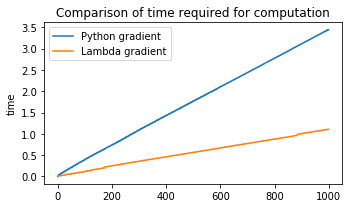

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(T1, label='Python gradient')
ax.plot(T2, label='Lambda gradient')
ax.set_title('Comparison of time required for computation')
ax.legend(loc='upper left')
ax.set_ylabel('number of computed samples')
ax.set_ylabel('time')
fig.tight_layout()